In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import gensim
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models import CoherenceModel
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# EDA

In [2]:
df = pd.read_csv('maindata.csv')

In [3]:
df.info

<bound method DataFrame.info of        Unnamed: 0  artist_name                              title  \
0               0       Halsey                         Without Me   
1               1       Halsey                             Colors   
2               2       Halsey                        Bad at Love   
3               3       Halsey                          Nightmare   
4               4       Halsey                              Sorry   
...           ...          ...                                ...   
32776         292  Nicki Minaj                     My Heart 2 You   
32777         293  Nicki Minaj  Pound the Alarm (Kitz Looper mix)   
32778         294  Nicki Minaj                             Mashup   
32779         295  Nicki Minaj                       Money Hungry   
32780         296  Nicki Minaj                             Go Off   

                                 album  \
0             Manic (Target Exclusive)   
1            BADLANDS (Deluxe Edition)   
2            

In [4]:
df.dtypes
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.isna().sum()

artist_name        0
title              0
album              0
lyrics           290
date           14099
url                0
dtype: int64

In [6]:
df['lyrics'] = df['lyrics'].fillna(value='')

In [7]:
def remove_punct(s):
    new_lyr = re.sub(r'[^\w\s]', '', s).lower()
    new_lyr = re.sub(r'[\n]', ' ', new_lyr).lower()
    return new_lyr

df.lyrics = df.lyrics.apply(remove_punct)

In [8]:
df["lyrics_len"] = [len(x) for x in df["lyrics"]]

In [9]:
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/rute/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['without_stopwords'] = df.apply(lambda x : ' '.join([w for w in x['lyrics'].split(' ') if w not in stop_words]), axis = 1)

In [11]:
new_df = df[df.lyrics_len != 0]
new_df = new_df[new_df.lyrics != "Instrumental"]
new_df

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...
...,...,...,...,...,...,...,...,...
32776,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...
32777,Nicki Minaj,Pound the Alarm (Kitz Looper mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...
32778,Nicki Minaj,Mashup,---,bingiling gyal with okra body to the front of ...,NaN,https://genius.com/Nicki-minaj-mashup-lyrics,54,bingiling gyal okra body front line
32779,Nicki Minaj,Money Hungry,---,lyrics not confirmed,2016-07-01,https://genius.com/Nicki-minaj-money-hungry-ly...,20,lyrics confirmed


In [12]:
q_low = new_df['lyrics_len'].quantile(0.02)
q_hi  = new_df['lyrics_len'].quantile(0.99)

df_filtered = new_df[(new_df['lyrics_len'] < q_hi) & (new_df['lyrics_len'] > q_low)]
df_filtered#.to_csv('df_filtered.csv')

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...
...,...,...,...,...,...,...,...,...
32773,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...
32774,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...
32775,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...
32776,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...


In [13]:
#describing wordcount by artist

artist_word_len = pd.DataFrame()

artist_word_len["Average Word Count"] = df_filtered.groupby(["artist_name"])["lyrics_len"].mean()
#artist_word_len["words_min"] = df_filtered.groupby(["artist_name"])["lyrics_len"].min()
#artist_word_len["words_max"] = df_filtered.groupby(["artist_name"])["lyrics_len"].max()
artist_word_len.to_csv("artist_len.csv")
artist_word_len

,Average Word Count
artist_name,
Aaliyah,1702.119565
Adele,1332.035088
Alabama Shakes,821.200000
Alanis Morissette,1280.470199
Alessia Cara,1661.833333
...,...
Tracy Chapman,1065.625000
VanJess,1552.631579
Whitney Houston,1440.927536


(array([ 436.,  802., 1524., 2101., 2678., 2769., 2859., 2692., 2521.,
        2338., 1979., 1693., 1279., 1133.,  969.,  763.,  577.,  457.,
         396.,  287.,  236.,  178.,  163.,   74.,   88.]),
 array([ 138.  ,  269.04,  400.08,  531.12,  662.16,  793.2 ,  924.24,
        1055.28, 1186.32, 1317.36, 1448.4 , 1579.44, 1710.48, 1841.52,
        1972.56, 2103.6 , 2234.64, 2365.68, 2496.72, 2627.76, 2758.8 ,
        2889.84, 3020.88, 3151.92, 3282.96, 3414.  ]),
 <a list of 25 Patch objects>)

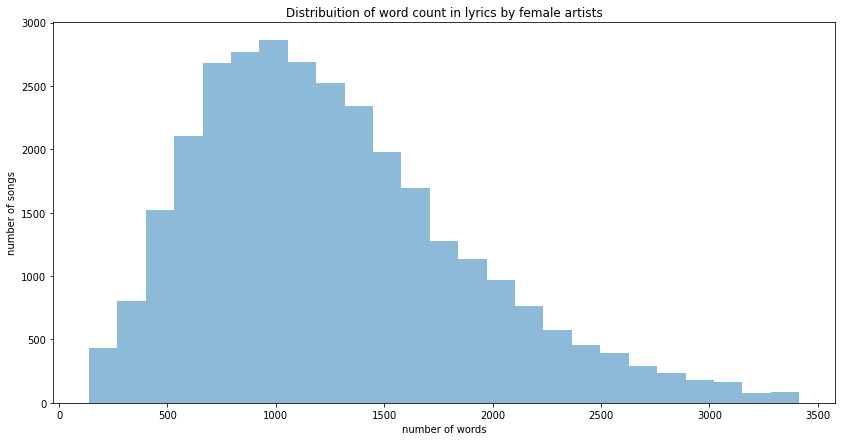

In [14]:
fig, ax = plt.subplots(figsize = (14, 7))

#plt.hist(artist_word_len["words_avg"], alpha = 0.5)
#plt.hist(artist_word_len["words_min"], alpha = 0.5)
#plt.hist(artist_word_len["words_max"], alpha = 0.5)
plt.title("Distribuition of word count in lyrics by female artists")
plt.xlabel("number of words")
plt.ylabel("number of songs")
plt.hist(df_filtered['lyrics_len'], bins = 25, alpha=0.5)

In [15]:
#describing unique words by artist
artist_word_unique = pd.DataFrame()
artist_word_unique["what"] = df_filtered.groupby(["artist_name", "without_stopwords"])

split_data = [list(i) for i in artist_word_unique["what"]]
artist_word_unique["Artist"] = [i[0] for i in split_data]
artist_word_unique["Lyrics"] = [i[1] for i in artist_word_unique["Artist"]]
artist_word_unique["Artist"] = [i[0] for i in artist_word_unique["Artist"]]

In [72]:
vc = artist_word_unique.Artist.value_counts()
vc = vc.reset_index()
vc.rename(columns={'Artist':'Number of Songs', 'index': 'Artist'}, inplace=True)
vc

,Artist,Number of Songs
0,Dolly Parton,643
1,Barbra Streisand,553
2,Aretha Franklin,482
3,Joan Baez,439
4,Céline Dion,413
...,...,...
234,Kadhja Bonet,24
235,Kelsey Lu,20
236,Kacy Hill,19
237,VanJess,19


In [75]:
#describing unique words by artist

def myfunc(x):
    s = [element for element in x]
    return " ".join(s)

df_perfect = artist_word_unique.groupby("Artist").agg({"Lyrics": lambda x: myfunc(x)})
#new_unique["Unique"] = [len(set(i)) for i in new_unique["Lyrics"]]

real_unique = df_perfect.Lyrics.apply(lambda x: len(set([i.strip() for i in x.split(" ") if i != ""])))
real_unique = real_unique.reset_index()
real_unique.rename(columns={'Lyrics':'Unique Words'}, inplace=True)
real_unique = real_unique.merge(vc, how="left", on="Artist")
real_unique


,Artist,Unique Words,Number of Songs
0,Aaliyah,1929,90
1,Adele,1497,56
2,Alabama Shakes,688,30
3,Alanis Morissette,4289,151
4,Alessia Cara,1540,48
...,...,...,...
234,Tracy Chapman,2139,96
235,VanJess,854,19
236,Whitney Houston,2166,136
237,Yeah Yeah Yeahs,1151,73


In [76]:
real_unique.to_csv("unique_words.csv")


# NLP

In [ ]:
nltk.download('punkt')

In [ ]:
tokens = nltk.word_tokenize(df_filtered['without_stopwords'][2])
print ('From: ', df_filtered['without_stopwords'][2])
print('\nTo: ', tokens) #tokens is a beauuuuutiful list

df_filtered['tokens'] = df_filtered['without_stopwords'].apply(nltk.word_tokenize) # THIS IS THE MOST EFFICIENT

In [ ]:
df_filtered

## Stemming

In [ ]:
ps = PorterStemmer ()
#print([ps.stem(w) for w in tokens])

## Apply per review
df_filtered['stemmed'] = df_filtered.apply(lambda x : [ps.stem(l) for l in x['tokens']], axis = 1)

In [ ]:
df_filtered

## Lemmatization

In [ ]:
nltk.download('wordnet')

In [ ]:
lemmatizer = WordNetLemmatizer()
#print([lemmatizer.lemmatize(ps.stem(w)) for w in tokens])   ## defalut variable with no documentation

## Apply per review
df_filtered['lemms'] = df_filtered.apply(lambda x : [lemmatizer.lemmatize(w) for w in x['stemmed']], axis = 1)

In [ ]:
df_filtered

In [ ]:
y = df_filtered['lemms']
X = df_filtered.drop(['lemms'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Bag of Words

In [ ]:
processed_docs = y_train

id2word = gensim.corpora.Dictionary(processed_docs)

In [ ]:
processed_docs

In [ ]:
id2word.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [ ]:
corpus = [id2word.doc2bow(doc) for doc in processed_docs]

In [ ]:
#printing for testing/checking

document_num = 20
bow_doc_x = corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     id2word[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

In [ ]:
lda_model =  gensim.models.LdaMulticore(corpus, 
                                   num_topics = 8, 
                                   id2word = id2word,                                    
                                   passes = 10, alpha = 0.02,
                                   workers = 2)

In [ ]:
'''
For each topic, these are the words occuring in that topic and their relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

## Tweaking and testing

In [ ]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_filtered['lemms'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_train = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_train

In [ ]:
pyLDAvis.save_html(LDAvis_train, 'lda.html')

In [ ]:
'''unprocessed_docs = y_test
id2word_test = gensim.corpora.Dictionary(unprocessed_docs)
id2word_test.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
corpus_test = [id2word.doc2bow(doc) for doc in unprocessed_docs]'''

In [ ]:
#LDAvis_test = pyLDAvis.gensim.prepare(lda_model, corpus_test, id2word_test)

#LDAvis_test